<a href="https://colab.research.google.com/github/bsmrvl/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/DS-module-project-221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

In [ ]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

# Decision Trees

## Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website (the URL is in Slack). Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.

## Wrangle Data

**Task 2:** Add to the code below so that `id` is set as the index for `df`.

In [ ]:
import pandas as pd
pd.options.display.max_columns = 100

# df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
#               pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv'))
# YOUR CODE HERE

df = pd.merge(pd.read_csv(DATA_PATH + 'waterpumps/train_features.csv'),
              pd.read_csv(DATA_PATH + 'waterpumps/train_labels.csv')).set_index('id')
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [ ]:
## See if we can safely call zeros NaNs.

# df.describe()

In [ ]:
##### NOTE I commented this out because it made the model worse. Then I tried
##### calling zeros NaNs across ALL columns. Even worse yet!

## Let's only call zeros NaNs if it's obvious. 

# import numpy as np

# cols_zeros_are_nans = ['longitude','latitude','population','district_code','construction_year']

# def near_zero_to_nan(inst):
#     if inst > -1e-07 and inst <= 0:
#         return np.NaN
#     else:
#         return inst

# for col in cols_zeros_are_nans:
#     df[col] = df[col].apply(near_zero_to_nan)
    
# df.describe()

**Test 2**

In [ ]:
'''Task 2 Testing'''

assert isinstance(df, pd.DataFrame), 'Have you created the DataFrame `df`?'
assert df.shape == (59400, 40), '`df` is the wrong shape. Did you set the index to `id`?'
assert 69572 in df.index, 'The index for `df` is has the wrong values. Did you set the index to `id`?'

In [ ]:
## WRANGLE FUNCTION

def wrangle(df):
    df = df.copy()
    
    df['month_recorded'] = pd.to_datetime(df['date_recorded']).dt.month
    df['year_recorded'] = pd.to_datetime(df['date_recorded']).dt.year
        
    card_above_50 = [col for col in df.select_dtypes('object') if df[col].nunique() > 50]
    df = df.drop(columns=card_above_50)
    
    return df
    
df = wrangle(df)

## Split Data

**Task 3:** Create your target vector `y` and feature matrix `X`.

In [ ]:
target = 'status_group'

# YOUR CODE HERE

X = df.drop(columns=target)
y = df[target]

**Test 3**

In [ ]:
'''Task 3 Testing'''

assert isinstance(X, pd.DataFrame), '`X` is the wrong data type.'
assert isinstance(y, pd.Series), '`y` is the wrong data type.'
assert y.shape == (59400,), '`y` is the wrong shape.'
assert X.shape == (59400,39), '`X` is the wrong shape.'

AssertionError: `X` is the wrong shape.

We already have a test set for this model, the `test.csv` that you'll use to make the predictions you'll upload to Kaggle. However, since our competition only allows for 2 submissions per day, we need a way to estimate our training error so that we can quickly iterate and improve our model. We can achieve this by creating a validation set from the data we have.

**Task 4:** Split `X` and `y` into training and validation sets. Your validation set should be 20% of the data you have. You should have four variables: `X_train`, `X_val`, `y_train`, and `y_val`. 

In [ ]:
from sklearn.model_selection import train_test_split

# YOUR CODE HERE

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

**Test 4**

In [ ]:
'''Task 4 Testing'''

assert X_train.shape == (47520, 39), '`X_train` is the wrong shape.'
assert X_val.shape == (11880, 39), '`X_val` is the wrong shape.'
assert y_train.shape == (47520,), '`y_train` is the wrong shape.'
assert y_val.shape == (11880,), '`y_val` is the wrong shape.'

AssertionError: `X_train` is the wrong shape.

## Establish Baseline

**Task 5:** This is a **classification** problem, so you need to establish the baseline accuracy for your training set. Find the majority class for `y_train` and calculate the percentage of labels in `y_train` belonging to that class. Assign your answer to the variable name `baseline_acc`.

In [ ]:
# YOUR CODE HERE

y_train.value_counts(normalize=True)

functional                 0.542971
non functional             0.384091
functional needs repair    0.072938
Name: status_group, dtype: float64

In [ ]:
baseline_acc = y_train.value_counts(normalize=True)[0]

In [ ]:
print('Baseline Accuracy:', baseline_acc)

Baseline Accuracy: 0.5429713804713805


**Task 5**

In [ ]:
'''Task 5 Testing'''

assert isinstance(baseline_acc, float), '`baseline_acc` should be a `float`.'
assert 0.0 <= baseline_acc <= 1.0, '`baseline_acc` is a score that should be between 0 and 1.'

## Build Model

**Task 6:** Create a model named `model` and train it with your training data. Your model should be a pipeline with (a) transformers that you think are appropriate to this dataset and (b) a `DecisionTreeClassifier` as your predictor. **Tip:** How can you transform categorical features and missing values in order to train your model?

In [ ]:
from category_encoders import OrdinalEncoder
from category_encoders import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

In [ ]:
##### Tried using OneHotEncoder on the lowest cardinality features. Made things worse!

# low_card = [col for col in X_train.select_dtypes('object') if X_train[col].nunique() < 5]
# med_card = [col for col in X_train.select_dtypes('object') if X_train[col].nunique() >= 5]

In [ ]:
# encoders = make_column_transformer(
#     (OneHotEncoder(), low_card),
#     (OrdinalEncoder(), med_card)
# )

In [ ]:
depths = range(6, 24, 2)
train_accs = []
val_accs = []

for depth in depths:
    model = make_pipeline(
#         encoders,
        OrdinalEncoder(),
        SimpleImputer(),
        DecisionTreeClassifier(max_depth=depth, random_state=42)
    )

    model.fit(X_train, y_train);
    train_accs.append(model.score(X_train, y_train))
    val_accs.append(model.score(X_val, y_val))

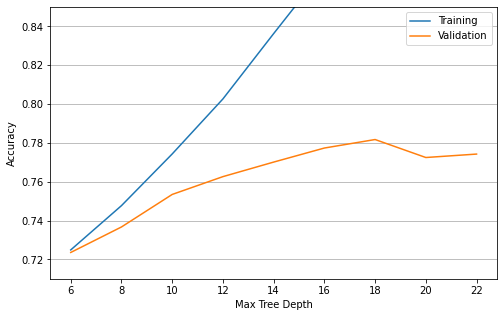

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[8,5])

ax.plot(depths, train_accs, label='Training')
ax.plot(depths, val_accs, label='Validation')

ax.set_xlabel('Max Tree Depth')
ax.set_ylabel('Accuracy')
ax.legend()
ax.grid(b=True, axis='y')

ax.set_ylim([.71, .85])

plt.show()

In [ ]:
model = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=18, random_state=42)
)

model.fit(X_train, y_train);

**Test 6**

In [ ]:
'''Task 6 Testing'''

assert len(model) > 1, 'Your model pipeline should have multiple steps.'
assert isinstance(model[-1], DecisionTreeClassifier), 'Your pipline should end in a `DecisionTreeClassifier`.'
assert hasattr(model, 'classes_'), 'Have you fit your model?'

## Check Metrics

**Task 7:** Calculate the training and validation accuracy of your model, and assign them to the valiables `training_acc` and `validation_acc`, respectively. Your validation accuracy should be greater than your baseline accuracy.

In [ ]:
# YOUR CODE HERE
training_acc = model.score(X_train, y_train)
validation_acc = model.score(X_val, y_val)

print('Training Accuracy:', training_acc)
print('Validation Accuracy:', validation_acc)

Training Accuracy: 0.8984848484848484
Validation Accuracy: 0.7817340067340067


**Test 7**

In [ ]:
'''Task 7 Testing'''

assert isinstance(training_acc, float)
assert isinstance(validation_acc, float)
assert 0.0 <= training_acc <= 1.0
assert 0.0 <= validation_acc <= 1.0

## Create Kaggle Submission

**Task 8:** Load `'waterpumps/test.csv'` into a DataFrame named `X_test`. Generate a list of predictions, and then put them into a DataFrame `submission`. Be sure that `submission` has the same index as `X_test` and that the column name for your predictions is `'status_group'`.  

In [ ]:
## Check what formatting I want to match.

y_val.head()

id
37098    non functional
14530        functional
62607        functional
46053    non functional
47083        functional
Name: status_group, dtype: object

In [ ]:
X_test = pd.read_csv(DATA_PATH + 'waterpumps/test_features.csv', index_col='id')

X_test = wrangle(X_test)

submission = pd.DataFrame({'status_group': model.predict(X_test)}, index=X_test.index)

submission.head()

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional


**Test 8**

In [ ]:
'''Task 8 Testing'''

assert isinstance(submission, pd.DataFrame), '`submission` should be a DataFrame.'
assert len(submission) == 14358, '`submission` should have 14358 rows.'

**Task 9 (`stretch goal`):** Save `submission` as a csv file using [`.to_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) and submit it to our Kaggle competition.

In [ ]:
# YOUR CODE HERE

submission.to_csv('pump_submission.csv')

## Explain

**Task 10 (`stretch goal`):** Make a horizontal barchart of the 10 most important features for your model.

In [ ]:
# YOUR CODE HERE

features = X_train.columns
importances = model.named_steps['decisiontreeclassifier'].feature_importances_

In [ ]:
assert len(features) == len(importances)

In [ ]:
feat_rank = pd.Series(importances, index=features, name='importance').sort_values()
feat_rank.tail(10)

district_code        0.017180
source_type          0.017585
amount_tsh           0.030782
population           0.036107
construction_year    0.054940
gps_height           0.068419
waterpoint_type      0.111533
latitude             0.132475
longitude            0.136017
quantity             0.196322
Name: importance, dtype: float64

In [ ]:
top_ten = feat_rank.tail(10)

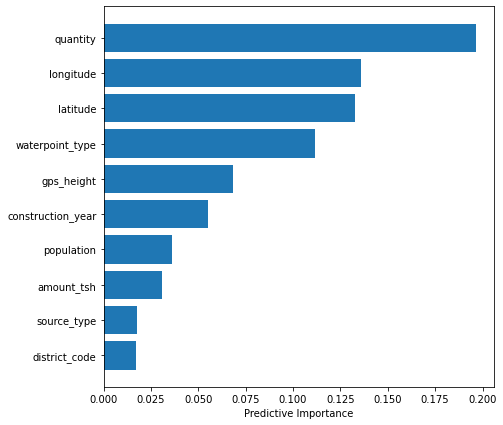

In [ ]:
fig, ax = plt.subplots(figsize=[7,7])

ax.barh(y=top_ten.index, width=top_ten)
ax.set_xlabel('Predictive Importance')

plt.show()